In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(
    "ignore", category=DeprecationWarning
)  # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [5]:
pd.set_option("display.max_columns", None)

In [2]:
# URL of the CSV file of INSEE data
insee_url = 'https://medical-deserts-project.s3.eu-north-1.amazonaws.com/insee_clean.csv'

# Read the CSV file from the URL into a DataFrame
insee_df_original = pd.read_csv(insee_url, sep = ',', encoding='utf-8')

In [3]:
insee_df = insee_df_original.copy()

In [6]:
insee_df.head()

,Dynamique Entrepreneuriale,Dynamique Entrepreneuriale Service et Commerce,Synergie Médicale COMMUNE,Indice Synergie Médicale,SEG Croissance POP,Nb Omnipraticiens BV,Nb Infirmiers Libéraux BV,Nb dentistes Libéraux BV,Nb pharmaciens Libéraux BV,Densité Médicale BV,Score équipement de santé BV,Indice Démographique,Indice Ménages,Nb Ménages,Nb Résidences Principales,Nb propriétaire,Nb Logement,Nb Résidences Secondaires,Nb Log Vacants,Nb Occupants Résidence Principale,Nb Entreprises Secteur Services,Nb Entreprises Secteur Commerce,Nb Entreprises Secteur Construction,Nb Entreprises Secteur Industrie,Nb Création Enteprises,Nb Création Industrielles,Nb Création Construction,Nb Création Commerces,Nb Création Services,Moyenne Revenus Fiscaux Départementaux,Moyenne Revenus Fiscaux Régionaux,Dep Moyenne Salaires Horaires,Dep Moyenne Salaires Cadre Horaires,Dep Moyenne Salaires Prof Intermédiaire Horaires,Dep Moyenne Salaires Employé Horaires,Dep Moyenne Salaires Ouvrié Horaires,Reg Moyenne Salaires Horaires,Reg Moyenne Salaires Cadre Horaires,Reg Moyenne Salaires Prof Intermédiaire Horaires,Reg Moyenne Salaires Employé Horaires,Reg Moyenne Salaires Ouvrié Horaires,Valeur ajoutée régionale,Score Urbanité,Nb Logement Secondaire et Occasionnel,Nb Hotel,Capacité Hotel,Nb Camping,Capacité Camping,Dynamique Démographique BV,Taux Propriété,Dynamique Démographique INSEE,Capacité Fisc,Moyenne Revnus fiscaux,"Nb Education, santé, action sociale",Nb Services personnels et domestiques,"Nb Santé, action sociale",Nb Industries des biens intermédiaires,Nb de Commerce,Nb de Services aux particuliers,"Nb institution de Education, santé, action sociale, administration",PIB Régionnal,Score Croissance Entrepreneuriale,Environnement Démographique,Fidélité,Seg Cap Fiscale,Seg Dyn Entre,DYN SetC,latitude,longitude,Catégorie commune dans aire d'attraction des villes 2020,Tranche détaillée d'aire d'attraction des villes 2020,Libellé degré de densité,Population en 2014 (princ),Pop 0-14 ans en 2014 (princ),Pop 15-29 ans en 2014 (princ),Pop 30-44 ans en 2014 (princ),Pop 45-59 ans en 2014 (princ),Pop 60-74 ans en 2014 (princ),Pop 75-89 ans en 2014 (princ),Pop 15 ans ou plus en 2014 (compl),Pop 15 ans ou plus Agriculteurs exploitants en 2014 (compl),"Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2014 (compl)","Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2014 (compl)",Pop 15 ans ou plus Prof. intermédiaires en 2014 (compl),Pop 15 ans ou plus Employés en 2014 (compl),Pop 15 ans ou plus Ouvriers en 2014 (compl),Pop 15 ans ou plus Retraités en 2014 (compl),Pop 15 ans ou plus Autres en 2014 (compl),taux chômage(15-64 ans),APL aux médecins généralistes (sans borne d'âge),APL aux médecins généralistes de 65 ans et moins,APL aux médecins généralistes de 62 ans et moins
0,57.0,23.0,114,114.56713,en croissance démographique,9,14,7,7,0.092860,4,44.19769,37.22029,247,248,196,289,32,9,728,7.0,11.0,2.0,2.0,4.0,0.0,2.0,1.0,1.0,12509,10458,11.410345,21.963793,12.558621,8.743103,9.268966,11.873022,21.78783,12.704057,8.783164,9.30142,86957.45836,0.0,32.0,0.0,0.0,0.0,0.0,1.Accroissement par excédent naturel et migrat...,67,-1,117,11483.5,3.0,1.0,0.0,9364,9350,3372,15105,173681,0.01585,Bassin Industriel en croissance démographique,Pop Sédentaire,Fiscalité moyenne,Faible dynamique,Faible Dynamique Serv et Com,46.153721,4.925850,Commune de la couronne,Aire de moins de 10 000 habitants,Rural à habitat dispersé,767.0,161.0,102.0,132.0,189.0,125.0,53.0,605.0,15.0,20.0,75.0,95.0,100.0,125.0,145.0,30.0,8.776596,2.293,2.010,1.546
1,45.0,4.0,143,143.71141,en croissance démographique,31,36,18,18,0.099229,4,10.18071,10.09619,67,67,61,142,71,4,168,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12509,10458,11.410345,21.963793,12.558621,8.743103,9.268966,11.873022,21.78783,12.704057,8.783164,9.30142,86957.45836,0.0,71.0,0.0,0.0,0.0,0.0,1.Accroissement par excédent naturel et migrat...,42,0,110,11483.5,0.0,0.0,0.0,9364,9350,3372,15105,173681,0.00173,Bassin Résidentiel en croissance démographique,Pop Séd

In [8]:
insee_df_APLsansborne = insee_df.drop(['APL aux médecins généralistes de 65 ans et moins', 'APL aux médecins généralistes de 62 ans et moins'], axis = 1)

In [9]:
def classification_APL(APL):
    if 0 <= APL < 2.5:
        return "Commune carrencée"
    elif 2.5 <= APL < 4:
        return "Offre insuffisante"
    else:
        return "Offre satisfaisante"

In [10]:
insee_df_APLsansborne['Offre médicale'] = insee_df_APLsansborne['APL aux médecins généralistes (sans borne d\'âge)'].apply(classification_APL)

In [15]:
insee_df_APLsansborne.drop("APL aux médecins généralistes (sans borne d\'âge)", axis = 1, inplace = True)

In [16]:
insee_df_APLsansborne.head()

,Dynamique Entrepreneuriale,Dynamique Entrepreneuriale Service et Commerce,Synergie Médicale COMMUNE,Indice Synergie Médicale,SEG Croissance POP,Nb Omnipraticiens BV,Nb Infirmiers Libéraux BV,Nb dentistes Libéraux BV,Nb pharmaciens Libéraux BV,Densité Médicale BV,Score équipement de santé BV,Indice Démographique,Indice Ménages,Nb Ménages,Nb Résidences Principales,Nb propriétaire,Nb Logement,Nb Résidences Secondaires,Nb Log Vacants,Nb Occupants Résidence Principale,Nb Entreprises Secteur Services,Nb Entreprises Secteur Commerce,Nb Entreprises Secteur Construction,Nb Entreprises Secteur Industrie,Nb Création Enteprises,Nb Création Industrielles,Nb Création Construction,Nb Création Commerces,Nb Création Services,Moyenne Revenus Fiscaux Départementaux,Moyenne Revenus Fiscaux Régionaux,Dep Moyenne Salaires Horaires,Dep Moyenne Salaires Cadre Horaires,Dep Moyenne Salaires Prof Intermédiaire Horaires,Dep Moyenne Salaires Employé Horaires,Dep Moyenne Salaires Ouvrié Horaires,Reg Moyenne Salaires Horaires,Reg Moyenne Salaires Cadre Horaires,Reg Moyenne Salaires Prof Intermédiaire Horaires,Reg Moyenne Salaires Employé Horaires,Reg Moyenne Salaires Ouvrié Horaires,Valeur ajoutée régionale,Score Urbanité,Nb Logement Secondaire et Occasionnel,Nb Hotel,Capacité Hotel,Nb Camping,Capacité Camping,Dynamique Démographique BV,Taux Propriété,Dynamique Démographique INSEE,Capacité Fisc,Moyenne Revnus fiscaux,"Nb Education, santé, action sociale",Nb Services personnels et domestiques,"Nb Santé, action sociale",Nb Industries des biens intermédiaires,Nb de Commerce,Nb de Services aux particuliers,"Nb institution de Education, santé, action sociale, administration",PIB Régionnal,Score Croissance Entrepreneuriale,Environnement Démographique,Fidélité,Seg Cap Fiscale,Seg Dyn Entre,DYN SetC,latitude,longitude,Catégorie commune dans aire d'attraction des villes 2020,Tranche détaillée d'aire d'attraction des villes 2020,Libellé degré de densité,Population en 2014 (princ),Pop 0-14 ans en 2014 (princ),Pop 15-29 ans en 2014 (princ),Pop 30-44 ans en 2014 (princ),Pop 45-59 ans en 2014 (princ),Pop 60-74 ans en 2014 (princ),Pop 75-89 ans en 2014 (princ),Pop 15 ans ou plus en 2014 (compl),Pop 15 ans ou plus Agriculteurs exploitants en 2014 (compl),"Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2014 (compl)","Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2014 (compl)",Pop 15 ans ou plus Prof. intermédiaires en 2014 (compl),Pop 15 ans ou plus Employés en 2014 (compl),Pop 15 ans ou plus Ouvriers en 2014 (compl),Pop 15 ans ou plus Retraités en 2014 (compl),Pop 15 ans ou plus Autres en 2014 (compl),taux chômage(15-64 ans),Offre médicale
0,57.0,23.0,114,114.56713,en croissance démographique,9,14,7,7,0.092860,4,44.19769,37.22029,247,248,196,289,32,9,728,7.0,11.0,2.0,2.0,4.0,0.0,2.0,1.0,1.0,12509,10458,11.410345,21.963793,12.558621,8.743103,9.268966,11.873022,21.78783,12.704057,8.783164,9.30142,86957.45836,0.0,32.0,0.0,0.0,0.0,0.0,1.Accroissement par excédent naturel et migrat...,67,-1,117,11483.5,3.0,1.0,0.0,9364,9350,3372,15105,173681,0.01585,Bassin Industriel en croissance démographique,Pop Sédentaire,Fiscalité moyenne,Faible dynamique,Faible Dynamique Serv et Com,46.153721,4.925850,Commune de la couronne,Aire de moins de 10 000 habitants,Rural à habitat dispersé,767.0,161.0,102.0,132.0,189.0,125.0,53.0,605.0,15.0,20.0,75.0,95.0,100.0,125.0,145.0,30.0,8.776596,Commune carrencée
1,45.0,4.0,143,143.71141,en croissance démographique,31,36,18,18,0.099229,4,10.18071,10.09619,67,67,61,142,71,4,168,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12509,10458,11.410345,21.963793,12.558621,8.743103,9.268966,11.873022,21.78783,12.704057,8.783164,9.30142,86957.45836,0.0,71.0,0.0,0.0,0.0,0.0,1.Accroissement par excédent naturel et migrat...,42,0,110,11483.5,0.0,0.0,0.0,9364,9350,3372,15105,173681,0.00173,Bassin Résidentiel en croissance démographique,Pop Sédentaire,Fiscalité moyenne,Faible dynamique,Faible Dynamique Serv et Com,46.009606,5.428088,Commune hors attraction des pôles,Commune

In [20]:
print('Number of rows :', insee_df_APLsansborne.shape[0])
print('Number of columns :', insee_df_APLsansborne.shape[1])
print()

# Dataset statistics
print('Basics statistics :')
summary_stats_all = insee_df_APLsansborne.describe(include='all')
display(summary_stats_all)
print()

# Missing values percentage
missing_percentages = (insee_df_APLsansborne.isna().mean() * 100).round(2)
print('Percentage of missing values: ')
print(missing_percentages)

Number of rows : 38590
Number of columns : 90

Basics statistics :


,Dynamique Entrepreneuriale,Dynamique Entrepreneuriale Service et Commerce,Synergie Médicale COMMUNE,Indice Synergie Médicale,SEG Croissance POP,Nb Omnipraticiens BV,Nb Infirmiers Libéraux BV,Nb dentistes Libéraux BV,Nb pharmaciens Libéraux BV,Densité Médicale BV,Score équipement de santé BV,Indice Démographique,Indice Ménages,Nb Ménages,Nb Résidences Principales,Nb propriétaire,Nb Logement,Nb Résidences Secondaires,Nb Log Vacants,Nb Occupants Résidence Principale,Nb Entreprises Secteur Services,Nb Entreprises Secteur Commerce,Nb Entreprises Secteur Construction,Nb Entreprises Secteur Industrie,Nb Création Enteprises,Nb Création Industrielles,Nb Création Construction,Nb Création Commerces,Nb Création Services,Moyenne Revenus Fiscaux Départementaux,Moyenne Revenus Fiscaux Régionaux,Dep Moyenne Salaires Horaires,Dep Moyenne Salaires Cadre Horaires,Dep Moyenne Salaires Prof Intermédiaire Horaires,Dep Moyenne Salaires Employé Horaires,Dep Moyenne Salaires Ouvrié Horaires,Reg Moyenne Salaires Horaires,Reg Moyenne Salaires Cadre Horaires,Reg Moyenne Salaires Prof Intermédiaire Horaires,Reg Moyenne Salaires Employé Horaires,Reg Moyenne Salaires Ouvrié Horaires,Valeur ajoutée régionale,Score Urbanité,Nb Logement Secondaire et Occasionnel,Nb Hotel,Capacité Hotel,Nb Camping,Capacité Camping,Dynamique Démographique BV,Taux Propriété,Dynamique Démographique INSEE,Capacité Fisc,Moyenne Revnus fiscaux,"Nb Education, santé, action sociale",Nb Services personnels et domestiques,"Nb Santé, action sociale",Nb Industries des biens intermédiaires,Nb de Commerce,Nb de Services aux particuliers,"Nb institution de Education, santé, action sociale, administration",PIB Régionnal,Score Croissance Entrepreneuriale,Environnement Démographique,Fidélité,Seg Cap Fiscale,Seg Dyn Entre,DYN SetC,latitude,longitude,Catégorie commune dans aire d'attraction des villes 2020,Tranche détaillée d'aire d'attraction des villes 2020,Libellé degré de densité,Population en 2014 (princ),Pop 0-14 ans en 2014 (princ),Pop 15-29 ans en 2014 (princ),Pop 30-44 ans en 2014 (princ),Pop 45-59 ans en 2014 (princ),Pop 60-74 ans en 2014 (princ),Pop 75-89 ans en 2014 (princ),Pop 15 ans ou plus en 2014 (compl),Pop 15 ans ou plus Agriculteurs exploitants en 2014 (compl),"Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2014 (compl)","Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2014 (compl)",Pop 15 ans ou plus Prof. intermédiaires en 2014 (compl),Pop 15 ans ou plus Employés en 2014 (compl),Pop 15 ans ou plus Ouvriers en 2014 (compl),Pop 15 ans ou plus Retraités en 2014 (compl),Pop 15 ans ou plus Autres en 2014 (compl),taux chômage(15-64 ans),Offre médicale
count,38590.000000,38590.000000,38590.000000,38590.000000,38590,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590,38590,38590,38590,38590,38590.000000,38590.000000,38590,38590,38590,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590.000000,38590
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,


Percentage of missing values: 
Dynamique Entrepreneuriale                        0.0
Dynamique Entrepreneuriale Service et Commerce    0.0
Synergie Médicale COMMUNE                         0.0
Indice Synergie Médicale                          0.0
SEG Croissance POP                                0.0
                                                 ... 
Pop 15 ans ou plus Ouvriers en 2014 (compl)       0.0
Pop 15 ans ou plus Retraités  en 2014 (compl)     0.0
Pop 15 ans ou plus Autres en 2014 (compl)         0.0
taux chômage(15-64 ans)                           0.0
Offre médicale                                    0.0
Length: 90, dtype: float64


In [22]:
# Separate target variable Y from features X
target_name = "Offre médicale"
print("Separating labels from features...")
Y = insee_df_APLsansborne.loc[:, target_name]
X = insee_df_APLsansborne.drop(target_name, axis=1)  # All columns are kept, except the target
print("...Done.")
print(Y.head())
print()
print(X.head())
print()

Separating labels from features...
...Done.
0      Commune carrencée
1     Offre insuffisante
2    Offre satisfaisante
3    Offre satisfaisante
4      Commune carrencée
Name: Offre médicale, dtype: object

   Dynamique Entrepreneuriale  Dynamique Entrepreneuriale Service et Commerce  \
0                        57.0                                            23.0   
1                        45.0                                             4.0   
2                       634.0                                           828.0   
3                       113.0                                            62.0   
4                        42.0                                             1.0   

   Synergie Médicale COMMUNE  Indice Synergie Médicale  \
0                        114                 114.56713   
1                        143                 143.71141   
2                        366                 367.82080   
3                        132                 132.65668   
4                

In [23]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i, t in X.dtypes.items():
    if ('float' in str(t)) or ('int' in str(t)):
        numeric_features.append(i)
    else:
        categorical_features.append(i)
print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Dynamique Entrepreneuriale', 'Dynamique Entrepreneuriale Service et Commerce', 'Synergie Médicale COMMUNE', 'Indice Synergie Médicale', 'Nb Omnipraticiens BV', 'Nb Infirmiers Libéraux BV', 'Nb dentistes Libéraux BV', 'Nb pharmaciens Libéraux BV', 'Densité Médicale BV', 'Score équipement de santé BV', 'Indice Démographique', 'Indice Ménages', 'Nb Ménages', 'Nb Résidences Principales', 'Nb propriétaire', 'Nb Logement', 'Nb Résidences Secondaires', 'Nb Log Vacants', 'Nb Occupants Résidence Principale', 'Nb Entreprises Secteur Services', 'Nb Entreprises Secteur Commerce', 'Nb Entreprises Secteur Construction', 'Nb Entreprises Secteur Industrie', 'Nb Création Enteprises', 'Nb Création Industrielles', 'Nb Création Construction', 'Nb Création Commerces', 'Nb Création Services', 'Moyenne Revenus Fiscaux Départementaux', 'Moyenne Revenus Fiscaux Régionaux', 'Dep Moyenne Salaires Horaires', 'Dep Moyenne Salaires Cadre Horaires', 'Dep Moyenne Salaires Prof Intermédiaire 

In [26]:
#Train-test splitting

print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [25]:
#Multiple Transformations preprocessing

# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [27]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
       Dynamique Entrepreneuriale  \
30576                        12.0   
17729                        36.0   
16956                        93.0   
36403                        71.0   
1257                        183.0   

       Dynamique Entrepreneuriale Service et Commerce  \
30576                                             9.0   
17729                                            15.0   
16956                                            95.0   
36403                                            56.0   
1257                                            149.0   

       Synergie Médicale COMMUNE  Indice Synergie Médicale  \
30576                         53                  53.26367   
17729                         59                  59.29352   
16956                        192                 192.95517   
36403                         74                  74.36814   
1257                          91                  91.45271   

                SEG

In [32]:
# Label encoding
print("Encoding labels...")
print(Y_train.head())
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("...Done")
print(Y_train[0:5])

# Label encoding
print("Encoding labels...")
print(Y_test.head())
Y_test = encoder.transform(Y_test)
print("...Done")
print(Y_test[0:5])

Encoding labels...
30576    Offre satisfaisante
17729     Offre insuffisante
16956    Offre satisfaisante
36403     Offre insuffisante
1257     Offre satisfaisante
Name: Offre médicale, dtype: object
...Done
[2 1 2 1 2]
Encoding labels...
9216     Offre satisfaisante
4541       Commune carrencée
27203     Offre insuffisante
30059      Commune carrencée
15785    Offre satisfaisante
Name: Offre médicale, dtype: object
...Done
[2 0 1 0 2]


In [35]:
# Train model
model = LogisticRegression(max_iter=1000) # or LniearRegression pour regression lineaire par exemple
print("Training model...")
model.fit(X_train, Y_train)  # Training is always done on train set !!
print("...Done.")

Training model...
...Done.


In [36]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = model.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[0 1 2 ... 1 2 1]

Probabilities on training set...
...Done.
[[0.40079356 0.32718854 0.2720179 ]
 [0.2936873  0.4053209  0.3009918 ]
 [0.01544679 0.28926813 0.69528508]
 ...
 [0.21774876 0.63112756 0.15112368]
 [0.04110969 0.2121471  0.74674321]
 [0.2338402  0.69888557 0.06727423]]



In [37]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = model.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[1 0 1 ... 1 0 2]

Probabilities on test set...
...Done.
[[0.17671588 0.61927117 0.20401295]
 [0.61326053 0.33979883 0.04694064]
 [0.22049636 0.62263967 0.15686397]
 ...
 [0.2518667  0.60987836 0.13825494]
 [0.58902002 0.3092712  0.10170878]
 [0.01400722 0.10928623 0.87670655]]



In [39]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()



accuracy on training set :  0.5768981601451153
accuracy on test set :  0.5611557398289713



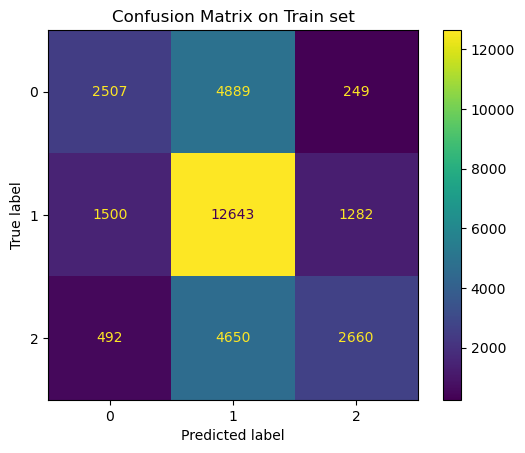

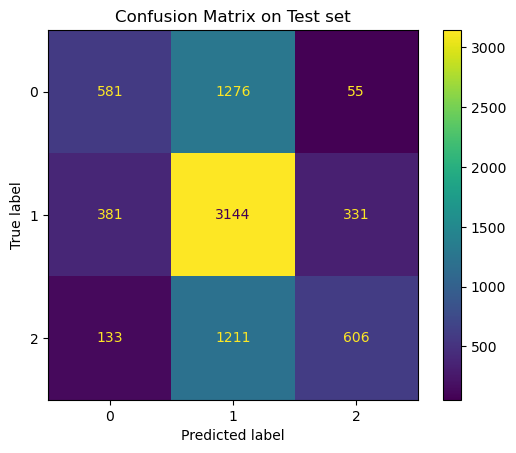

In [40]:
# Visualize confusion matrices
_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="Confusion Matrix on Train set"
)  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    model, X_train, Y_train, ax=ax
)  # ConfusionMatrixDisplay from sklearn
plt.show()

_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="Confusion Matrix on Test set"
)  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    model, X_test, Y_test, ax=ax
)  # ConfusionMatrixDisplay from sklearn
plt.show()

In [42]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, Y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)



array(['Offre insuffisante', 'Offre insuffisante', 'Offre insuffisante',
       ..., 'Offre insuffisante', 'Offre insuffisante',
       'Offre insuffisante'], dtype='<U18')

In [43]:
dummy_clf.score(X, Y)

0.499637211712879

Test avec uniquement les features de l'étude "La problématique de l’accès aux soins face aux défis de la déprise médicale:  quelles perspectives territoriales ?

In [46]:
# URL of the CSV file of cities data
cities_url = 'https://medical-deserts-project.s3.eu-north-1.amazonaws.com/cities.csv'

# Read the CSV file from the URL into a DataFrame
cities_df = pd.read_csv(cities_url)

In [47]:
# Dataset customization

# Change columns name
cities_df = cities_df.rename(columns={'city_code': 'Ville', 'insee_code': 'Code commune'})

# Focus on metropolitan France
cities_df = cities_df[~cities_df['Code commune'].str.startswith(('97', '98'))]

In [48]:
population_stats = pd.read_csv('https://medical-deserts.s3.eu-west-3.amazonaws.com/population_stat.csv', sep = ',', encoding='utf-8')

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_3468\1497547525.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  population_stats = pd.read_csv('https://medical-deserts.s3.eu-west-3.amazonaws.com/population_stat.csv', sep = ',', encoding='utf-8')


In [49]:
population_stats = population_stats.rename(columns={'CODGEO': 'Code commune'})

# Convert the 'Code commune' column to strings
population_stats['Code commune'] = population_stats['Code commune'].astype(str)

# Focus on metropolitan France
population_stats = population_stats[~population_stats['Code commune'].str.startswith(('97', '98'))]

In [50]:
urbanisation_df = pd.read_csv('https://medical-deserts.s3.eu-west-3.amazonaws.com/urbanisation_ville.csv', sep = ',', encoding='utf-8')

In [52]:
urbanisation_df.rename(columns={'CODGEO': 'Code commune'}, inplace = True)
urbanisation_df = urbanisation_df[~urbanisation_df['Code commune'].str.startswith(('97', '98'))]


In [ ]:
data_etude = 